In [1]:
from __future__ import absolute_import, division, print_function

In [2]:
import tensorflow as tf
import numpy as np
rng = np.random

In [3]:
# Parameters.
learning_rate = 0.01
training_steps = 1000
display_step = 50

In [4]:
# Training Data.
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
              7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
              2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = X.shape[0]

In [5]:
# Weight and Bias, initialized randomly.
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Linear regression (Wx + b).
def linear_regression(x):
    return W * x + b

# Mean square error.
def mean_square(y_pred, y_true):
    return tf.reduce_sum(tf.pow(y_pred-y_true, 2)) / (2 * n_samples)

# Stochastic Gradient Descent Optimizer.
optimizer = tf.optimizers.SGD(learning_rate)

In [6]:
# Optimization process. 
def run_optimization():
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)

    # Compute gradients.
    gradients = g.gradient(loss, [W, b])
    
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, [W, b]))

In [7]:
# Run training for the given number of steps.
for step in range(1, training_steps + 1):
    # Run the optimization to update W and b values.
    run_optimization()
    
    if step % display_step == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))

step: 50, loss: 0.077202, W: 0.242265, b: 0.865227
step: 100, loss: 0.077171, W: 0.242817, b: 0.861313
step: 150, loss: 0.077143, W: 0.243337, b: 0.857630
step: 200, loss: 0.077119, W: 0.243826, b: 0.854164
step: 250, loss: 0.077097, W: 0.244286, b: 0.850902
step: 300, loss: 0.077078, W: 0.244719, b: 0.847832
step: 350, loss: 0.077061, W: 0.245127, b: 0.844943
step: 400, loss: 0.077046, W: 0.245510, b: 0.842224
step: 450, loss: 0.077032, W: 0.245871, b: 0.839666
step: 500, loss: 0.077020, W: 0.246210, b: 0.837258
step: 550, loss: 0.077010, W: 0.246530, b: 0.834993
step: 600, loss: 0.077001, W: 0.246831, b: 0.832860
step: 650, loss: 0.076992, W: 0.247114, b: 0.830853
step: 700, loss: 0.076985, W: 0.247380, b: 0.828965
step: 750, loss: 0.076979, W: 0.247631, b: 0.827187
step: 800, loss: 0.076973, W: 0.247867, b: 0.825515
step: 850, loss: 0.076968, W: 0.248089, b: 0.823941
step: 900, loss: 0.076963, W: 0.248298, b: 0.822460
step: 950, loss: 0.076960, W: 0.248494, b: 0.821066
step: 1000, l

In [8]:
import matplotlib.pyplot as plt

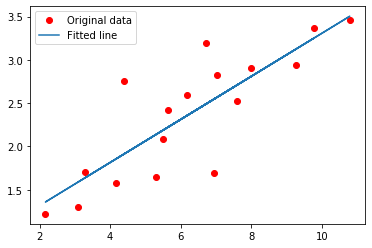

In [9]:
# Graphic display
plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, np.array(W * X + b), label='Fitted line')
plt.legend()
plt.show()
